In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# mean squared error
def MSE(original, compressed):
    return np.mean((original - compressed) ** 2)


# peak signal-to-noise radio
def PSNR(original, compressed):
    mse = MSE(original, compressed)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))

def segment_img(path, outpath, K):
    in_img = cv2.imread(path)
    Z = in_img.reshape((-1, 3))
    Z = np.float32(Z)

    _, label, center = cv2.kmeans(
        Z,
        K,
        None,
        criteria,
        10,
        cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    out_img = res.reshape((in_img.shape))
    # print("MSE =", MSE(in_img, out_img))
    # print("PSNR =", PSNR(in_img, out_img), "db")
    print(f"{K} & {MSE(in_img, out_img)} & {PSNR(in_img, out_img)} db \\\\")
    print("\\hline")
    cv2.imwrite(outpath, out_img)

def plot_distortion(path):
    in_img = cv2.imread(path)
    Z = in_img.reshape((-1, 3))
    Z = np.float32(Z)

    losses = []
    for K in range(2, 11):
        compactness = cv2.kmeans(
            Z,
            K,
            None,
            criteria,
            10,
            cv2.KMEANS_PP_CENTERS)[0]
        losses.append(compactness)
    
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(2, 11), losses, 'bx-')
    plt.xlabel('Giá trị K')
    plt.ylabel('Độ biến dạng')
    plt.title('Biểu đồ phương pháp Elbow')
    plt.show()


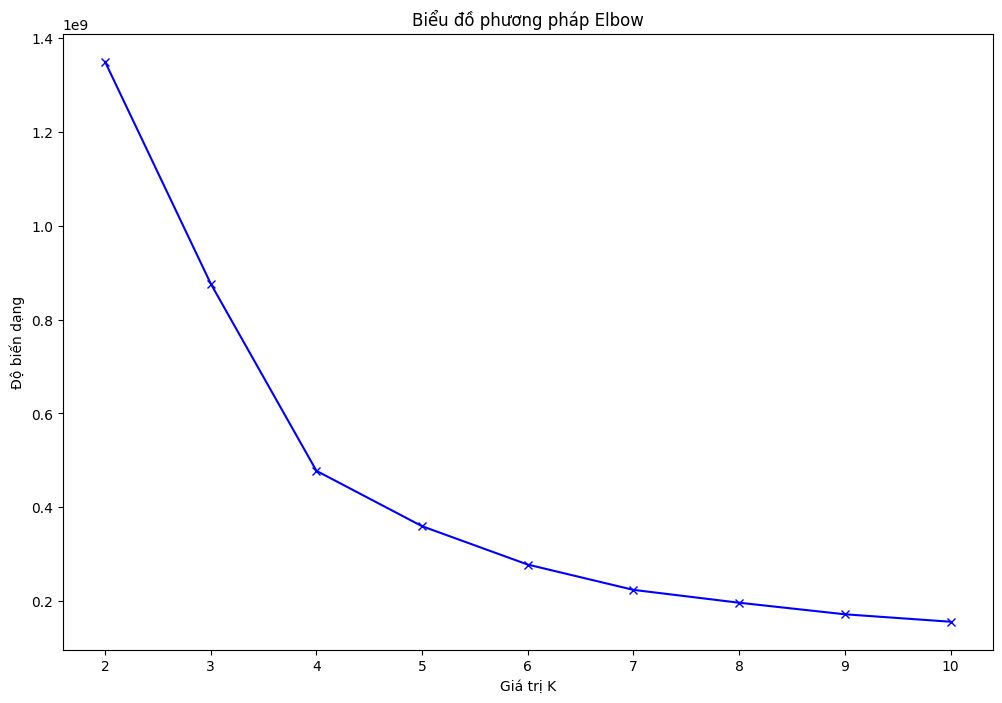

In [22]:
plot_distortion('img/hydrangea.jpg')

In [23]:
for i in range(2, 11):
    segment_img('img/hydrangea.jpg', f'img/hydrangea_out{i}.jpg', i)


2 & 97.45104909318324 & 28.24293842063546 db \\ \hline
3 & 81.20780644152596 & 29.03482581238562 db \\ \hline
4 & 75.0234873358349 & 29.378831131631912 db \\ \hline
5 & 73.49087242026266 & 29.468469578880857 db \\ \hline
6 & 65.38281894934335 & 29.976167198185337 db \\ \hline
7 & 61.63952157598499 & 30.232211016475517 db \\ \hline
8 & 60.357944809255784 & 30.32345917259307 db \\ \hline
9 & 57.644989055659785 & 30.523187998019875 db \\ \hline
10 & 53.14433083176986 & 30.8762341787494 db \\ \hline


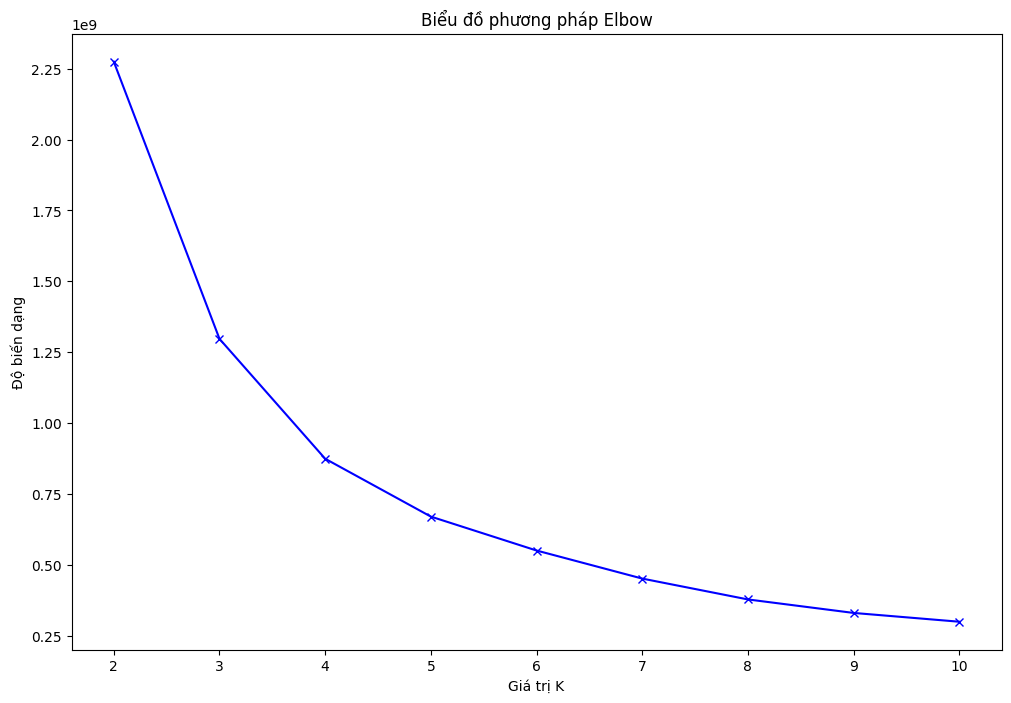

In [24]:
plot_distortion('img/lake.jpg')

In [25]:
for i in range(2, 11):
    segment_img('img/lake.jpg', f'img/lake_out{i}.jpg', i)

2 & 91.63910728910729 & 28.509995110500597 db \\ \hline
3 & 86.35624556374556 & 28.76786608243142 db \\ \hline
4 & 84.1382371007371 & 28.88086952609832 db \\ \hline
5 & 75.9043174993175 & 29.328138812464672 db \\ \hline
6 & 70.61036274911275 & 29.642119182510047 db \\ \hline
7 & 67.81548764673765 & 29.817514718475238 db \\ \hline
8 & 61.98859302484303 & 30.207685817268754 db \\ \hline
9 & 58.070733346983346 & 30.491230503066515 db \\ \hline
10 & 56.90866878241878 & 30.579019342336085 db \\ \hline


In [26]:
plot_distortion('img/dog.jpg')

KeyboardInterrupt: 

In [ ]:
for i in range(2, 11):
    segment_img('img/dog.jpg', f'img/dog_out{i}.jpg', i)

2 & 92.18243506944444 & 28.48432184707367 db \\
3 & 84.83147083333333 & 28.84523363873758 db \\
4 & 80.39396770833334 & 29.07856897806878 db \\
5 & 74.04040729166667 & 29.43611561753591 db \\
6 & 71.5779732638889 & 29.583009637232664 db \\
7 & 69.71671215277777 & 29.69743463318871 db \\
8 & 64.50938854166667 & 30.03457435455625 db \\
9 & 61.6438125 & 30.23190870073484 db \\
10 & 60.58937395833333 & 30.306838957099828 db \\
